# Data analysis - COVID 19

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Dados globais de covid 19

In [9]:
arquivo = '../data/WHO-COVID-19-global-data.csv'
covid_global = pd.read_csv(arquivo, sep=';', encoding='utf-8')

In [10]:
covid_global

Date_reported Country_code      Country WHO_region  New_cases  \
0        05/01/2020           AF  Afghanistan       EMRO        NaN   
1        12/01/2020           AF  Afghanistan       EMRO        NaN   
2        19/01/2020           AF  Afghanistan       EMRO        NaN   
3        26/01/2020           AF  Afghanistan       EMRO        NaN   
4        02/02/2020           AF  Afghanistan       EMRO        NaN   
...             ...          ...          ...        ...        ...   
57835    14/07/2024           ZW     Zimbabwe       AFRO        NaN   
57836    21/07/2024           ZW     Zimbabwe       AFRO        1.0   
57837    28/07/2024           ZW     Zimbabwe       AFRO        NaN   
57838    04/08/2024           ZW     Zimbabwe       AFRO        NaN   
57839    11/08/2024           ZW     Zimbabwe       AFRO        NaN   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                     0         NaN                  0  
1                     0         NaN                  0  
2                     0         NaN                  0  
3                     0         NaN                  0  
4                     0         NaN                  0  
...                 ...         ...                ...  
57835            266385         NaN               5740  
57836            266386         NaN               5740  
57837            266386         NaN               5740  
57838            266386         NaN               5740  
57839            266386         NaN               5740  

[57840 rows x 8 columns]

In [11]:
covid_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [13]:
covid_global.describe(include='all')

Date_reported Country_code      Country WHO_region     New_cases  \
count          57840        57599        57840      53502  3.902800e+04   
unique           241          239          240          7           NaN   
top       05/01/2020           AF  Afghanistan       EURO           NaN   
freq             240          241          241      13255           NaN   
mean             NaN          NaN          NaN        NaN  1.988104e+04   
std              NaN          NaN          NaN        NaN  2.707823e+05   
min              NaN          NaN          NaN        NaN -6.507900e+04   
25%              NaN          NaN          NaN        NaN  4.300000e+01   
50%              NaN          NaN          NaN        NaN  3.930000e+02   
75%              NaN          NaN          NaN        NaN  3.968000e+03   
max              NaN          NaN          NaN        NaN  4.047548e+07   

        Cumulative_cases    New_deaths  Cumulative_deaths  
count       5.784000e+04  25001.000000       5.784000e+04  
unique               NaN           NaN                NaN  
top                  NaN           NaN                NaN  
freq                 NaN           NaN                NaN  
mean        1.792594e+06    282.323947       2.001023e+04  
std         7.797691e+06   1214.392195       8.186440e+04  
min         0.000000e+00  -3432.000000       0.000000e+00  
25%         4.162750e+03      4.000000       2.800000e+01  
50%         4.588300e+04     20.000000       5.650000e+02  
75%         5.220872e+05    105.000000       6.974500e+03  
max         1.034368e+08  47687.000000       1.194158e+06

### Limpando dados e normalizando colunas

In [14]:
covid_global.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [31]:
def carrega_e_formata_dados_covid_global():
    arquivo = '../data/WHO-COVID-19-global-data.csv'
    covid_global = pd.read_csv(arquivo, sep=';', encoding='utf-8')
    covid_global['Date_reported'] = pd.to_datetime(covid_global.Date_reported, dayfirst=True)
    covid_global['Country_code'] = covid_global['Country_code'].fillna('?').astype('category')
    covid_global['Country'] = covid_global.Country.astype('category')
    covid_global['WHO_region'] = covid_global['WHO_region'].fillna('?').astype('category')
    covid_global['New_cases'] = covid_global['New_cases'].fillna(0).astype(int)
    covid_global['New_deaths'] = covid_global['New_deaths'].fillna(0).astype(int)

    return covid_global

In [32]:
covid_global = carrega_e_formata_dados_covid_global()

In [33]:
covid_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      57840 non-null  datetime64[ns]
 1   Country_code       57840 non-null  category      
 2   Country            57840 non-null  category      
 3   WHO_region         57840 non-null  category      
 4   New_cases          57840 non-null  int64         
 5   Cumulative_cases   57840 non-null  int64         
 6   New_deaths         57840 non-null  int64         
 7   Cumulative_deaths  57840 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(4)
memory usage: 2.5 MB


<Axes: xlabel='Date_reported', ylabel='Cumulative_cases'>

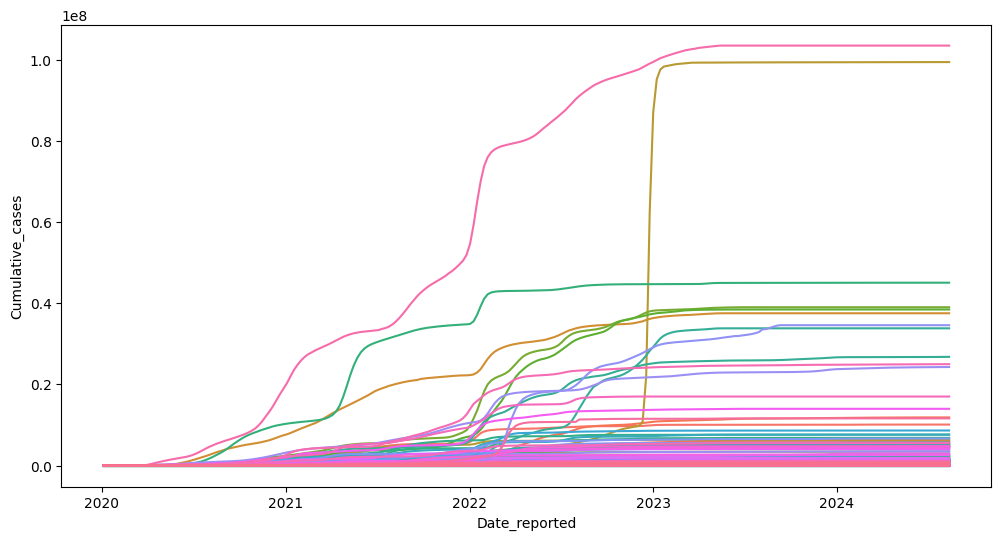

In [36]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=covid_global, x='Date_reported', y='Cumulative_cases', hue='Country', legend=False)

In [38]:
px.line(covid_global, x='Date_reported', y='Cumulative_cases', color='Country', title='Casos acumulados de COVID-19 no mundo')

In [57]:
px.line(covid_global, x='Date_reported', y='New_cases', color='Country', title='Novos casos de COVID-19 no mundo')

In [51]:
covid_global_grouped = covid_global.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
px.scatter_geo(covid_global_grouped, locations=covid_global_grouped.index, size=covid_global_grouped.values, locationmode='country names', title='Casos acumulados de COVID-19 no mundo', width=1000, height=600)

C:\Users\JONAT\AppData\Local\Temp\ipykernel_17024\1899043151.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

